<a href="https://colab.research.google.com/github/necronet/Notebooks/blob/master/DSP/AudioFeatureExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install librosa==0.8.0

     |████████████████████████████████| 184kB 2.7MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
  Created wheel for librosa: filename=librosa-0.8.0-cp36-none-any.whl size=201377 sha256=24b59b3ce182eca227b3acafbe1716b9b84fa1e61633409749fa888b4b3d7231
  Stored in directory: /root/.cache/pip/wheels/ee/10/1e/382bb4369e189938d5c02e06d10c651817da8d485bfd1647c9
Successfully built librosa
  Found existing installation: librosa 0.6.3
    Uninstalling librosa-0.6.3:
      Successfully uninstalled librosa-0.6.3


In [2]:
import librosa

In [256]:
y, sr = librosa.load(librosa.ex('fishin'), duration=5, offset=10)
#y, sr = librosa.load("gdrive/My Drive/Colab Notebooks/Dataset/audio/simpleLoop.wav", duration=3)

In [249]:
import librosa.display
import IPython.display as ipd
from google.colab import drive
import numpy as np
import sklearn

In [140]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [145]:
#Checking the audio file to be loaded
!ls "gdrive/My Drive/Colab Notebooks/Dataset/audio/simpleLoop.wav"

28042__bcjordan__voicedownbew.wav     simpleLoop.wav
92002__jcveliz__violin-origional.wav


In [149]:
x0 = 0
x1 = 1110

In [252]:
ipd.Audio(y, rate=sr)

In [151]:
zero_crossings = librosa.zero_crossings(y[x0:x1])
zero_crossings_rate = librosa.feature.zero_crossing_rate(y[x0:x1])

print(zero_crossings.shape)
print(zero_crossings_rate)

(1110,)
[[0.00244141 0.00244141 0.00244141]]


In [173]:
librosa.display.waveplot(y, sr=sr, alpha=0.5)


110250


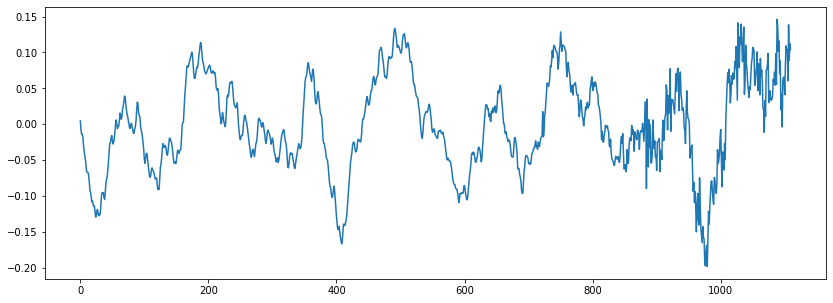

In [174]:
import matplotlib.pyplot as plt
print(len(y))

plt.figure(figsize=(14, 5))
plt.plot(y[x0:x1])

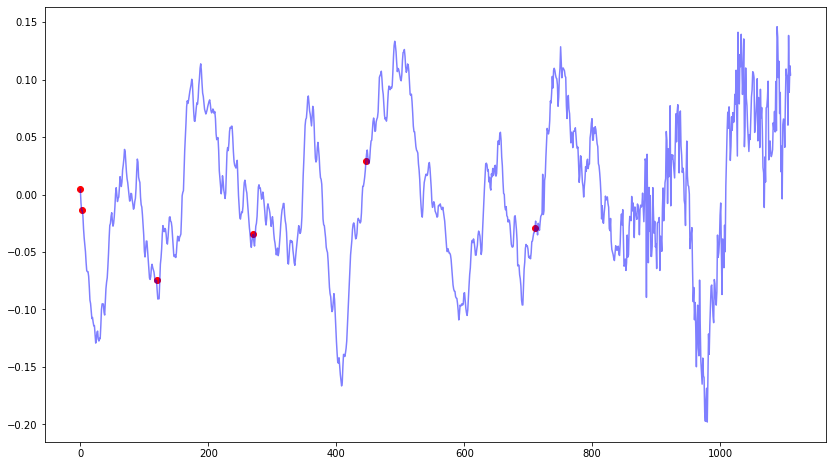

In [175]:
X = np.linspace(0, zero_crossings.shape[0], num = zero_crossings.shape[0])
plt.figure(figsize=(14, 8))
plt.plot(X, y[x0:x1], "-b", alpha = .5)
plt.scatter(X[zero_crossings], y[x0:x1][zero_crossings], c='r')

In [176]:
librosa.get_duration(y, sr)

5.0

In [212]:
hop_length = 256
frame_length = 512
energy = np.array([
    sum(abs(y[i:i+frame_length]**2))
    for i in range(0, len(y), hop_length)
])

In [213]:
rmse = librosa.feature.rms(y, frame_length=frame_length, hop_length=hop_length, center=True)

'''
Internally it looks like this the calculation of rmse
energy = np.array([
    np.sqrt(np.mean(abs(y[i:i+frame_length]**2)))
    for i in range(0, len(y), hop_length)
])
'''

print(rmse[0][0])
print(energy[0])

0.060172845
2.200576485155023


In [214]:
frames = range(len(energy))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
time = np.arange(0,len(y))/sr

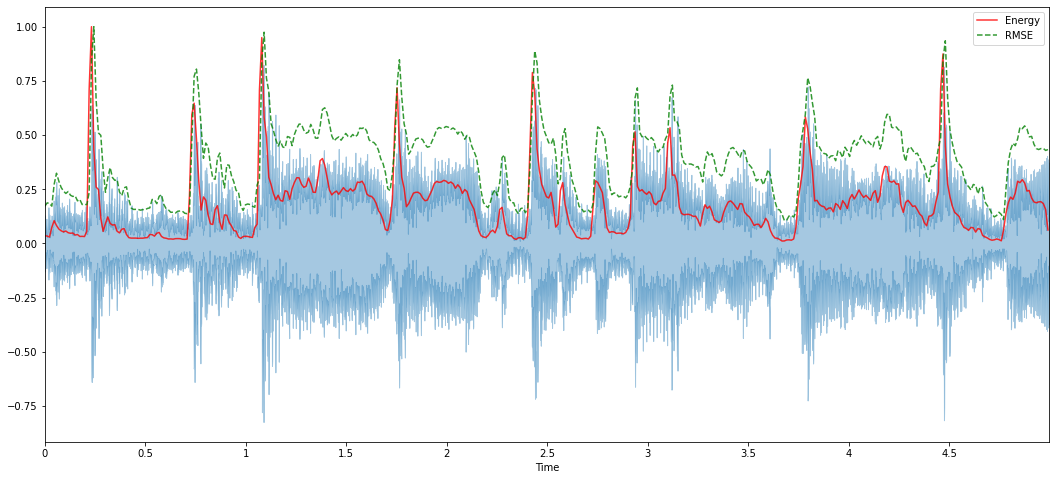

In [215]:
plt.figure(figsize=(18, 8))
#plt.plot(t, energy, "-b", alpha = .5)
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, energy/energy.max(), "-r", alpha = .8)
plt.plot(t, rmse[0]/rmse[0].max(), "--g", alpha = .8)
plt.legend(('Energy', 'RMSE'))


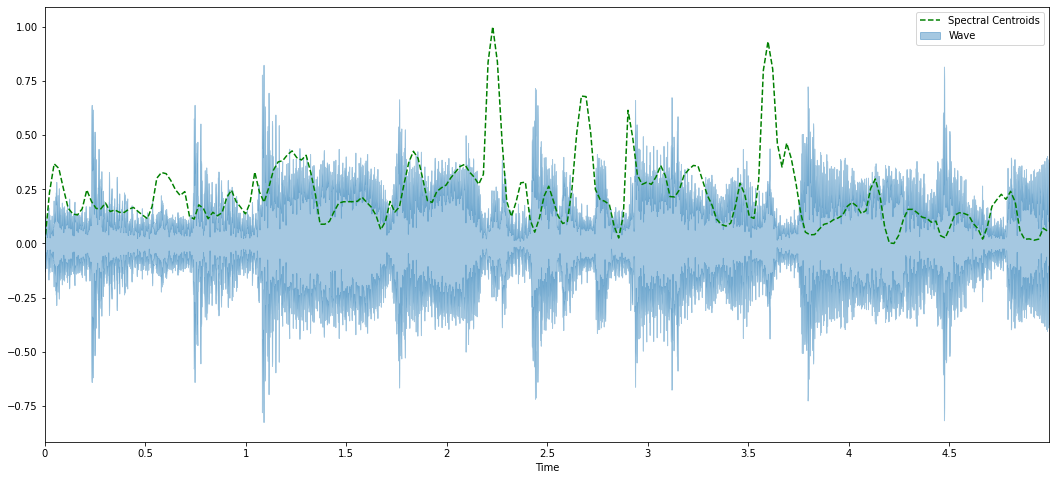

In [222]:
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)
frames = range(len(spectral_centroids[0]))
t = librosa.frames_to_time(frames)
mn, mx = spectral_centroids[0].min(), spectral_centroids[0].max()
x_scaled = (spectral_centroids[0] - mn) / (mx - mn)

plt.figure(figsize=(18, 8))

librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, x_scaled, '--g')
plt.legend(('Spectral Centroids','Wave'))

In [225]:
mfccs = librosa.feature.mfcc(y, sr=sr)

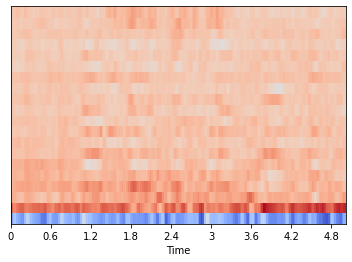

In [228]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


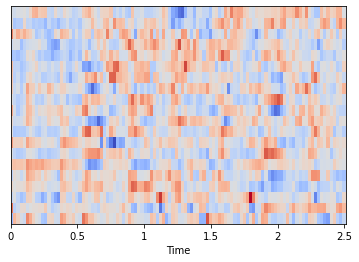

In [238]:
librosa.display.specshow(sklearn.preprocessing.scale(mfccs, axis=1), sr=sr, x_axis='time')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


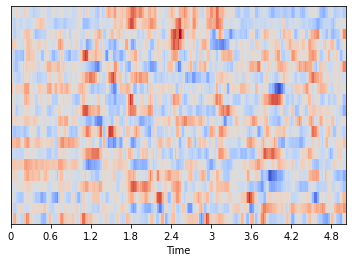

In [241]:
mfccs = librosa.feature.mfcc(y, sr=sr, n_mels=256)
librosa.display.specshow(sklearn.preprocessing.scale(mfccs, axis=1), sr=sr, x_axis='time')

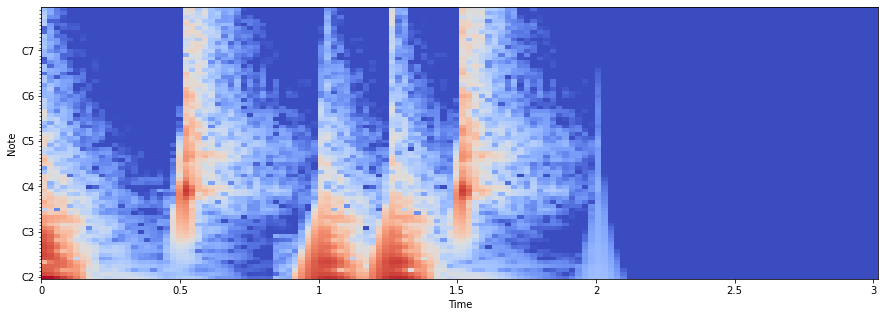

In [251]:
fmin = librosa.midi_to_hz(36)
hop_length = 512
C = librosa.cqt(y, sr=sr, fmin=fmin, n_bins=72, hop_length=hop_length)
logC = librosa.amplitude_to_db(np.abs(C))
plt.figure(figsize=(15, 5))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')

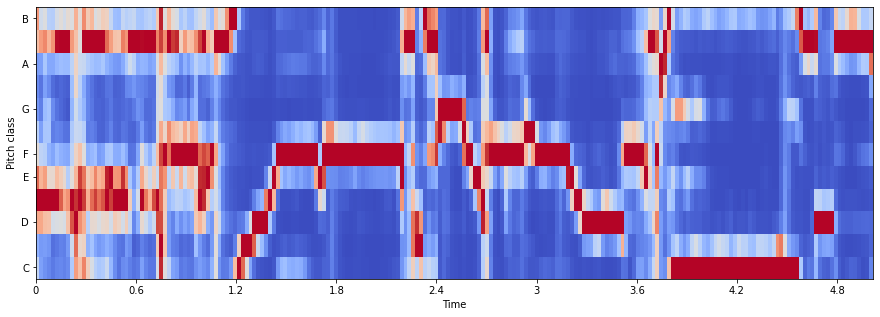

In [257]:
chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')